In [2]:
# DataFrame
import pandas as pd 

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

c:\Users\devas\miniconda3\envs\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df=pd.read_csv('Data/training.1600000.processed.noemoticon.csv',encoding='latin',header=None)

In [5]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.columns=['sentiment', 'id', 'date', 'query', 'user_id', 'text']

In [7]:
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
# we train only on text for sentiment
df=df.drop(['id', 'date', 'query', 'user_id'],axis=1)

In [9]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [10]:
df['sentiment']=df['sentiment'].replace(4,1)
df.head()  
df.tail() 

,sentiment,text
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...
1599999,1,happy #charitytuesday @theNSPCC @SparksCharity...


In [11]:
val_counts=df['sentiment'].value_counts()
val_counts

sentiment
0    800000
1    800000
Name: count, dtype: int64

Text(0.5, 1.0, 'sentiment distribution')

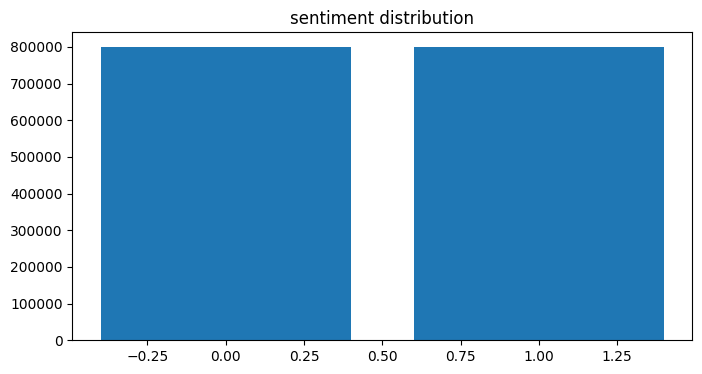

In [12]:
plt.figure(figsize=(8,4))
plt.bar(val_counts.index,val_counts.values)
plt.title('sentiment distribution')

In [13]:
# get a word count per of text
def word_count(words):
    return len(words.split())

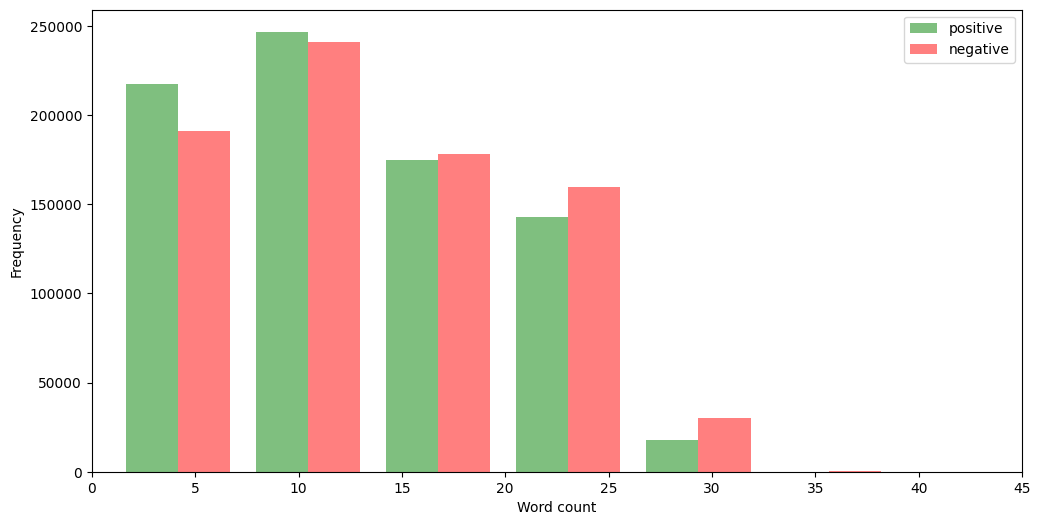

In [14]:
# plot word count distribution for both positive and negative 

df['word count'] = df['text'].apply(word_count)
p = df['word count'][df.sentiment == 1]
n = df['word count'][df.sentiment == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [15]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'below', 'very', 'itself', 'doesn', "needn't", "shouldn't", 'won', 'through', 'them', 'your', 'has', 'an', 'ours', "you'd", "hasn't", 'at', 'for', 'it', 'most', 'd', 'during', "couldn't", 'mightn', "weren't", 'himself', 'whom', 'ourselves', 'didn', 'between', 'how', 'yours', 'with', "won't", 'her', 'needn', 'further', "it's", 'hadn', 'and', 'have', 'were', "you're", 'wouldn', 'we', "that'll", 'can', 'up', 'hasn', 'just', 'isn', 'yourself', 's', "wouldn't", 'now', 'or', 'until', 'there', 'aren', 'o', 'shan', 'by', 'they', 'in', 'my', "doesn't", 'that', 'under', 've', 'herself', 'when', 'm', "don't", 'after', 'will', 'of', 'down', 'own', "you've", "shan't", 'is', 'those', 'yourselves', 'few', 'both', 'ma', 'but', 'any', 'their', 'having', 'couldn', "mightn't", 'than', 'on', 'be', 'what', 'did', "you'll", 'because', 'these', 'then', 't', 'll', 'was', 'i', 'the', 'shouldn', 'theirs', 'above', 'into', 'not', "wasn't", 'such', 'this', 'ain', 'mustn', 'haven', 'once', "haven't", 'our', 'wasn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
df['text'] = df['text'].astype('str')
df.head()

,sentiment,text,word count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,0,is upset that he can't update his Facebook by ...,21
2,0,@Kenichan I dived many times for the ball. Man...,18
3,0,my whole body feels itchy and like its on fire,10
4,0,"@nationwideclass no, it's not behaving at all....",21


In [18]:
from nltk.tokenize import word_tokenize
import string

urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = r'@[^\s]+'
def preprocess(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [19]:
import time
t = time.time()
df['processed_tweets'] = df['text'].apply(lambda x: preprocess(x))
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 130 seconds


In [20]:
df.head()

,sentiment,text,word count,processed_tweets
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,switchfoot awww thats bummer shoulda got david...
1,0,is upset that he can't update his Facebook by ...,21,upset cant update facebook texting might cry r...
2,0,@Kenichan I dived many times for the ball. Man...,18,kenichan dived many time ball managed save 50 ...
3,0,my whole body feels itchy and like its on fire,10,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",21,nationwideclass behaving im mad cant see


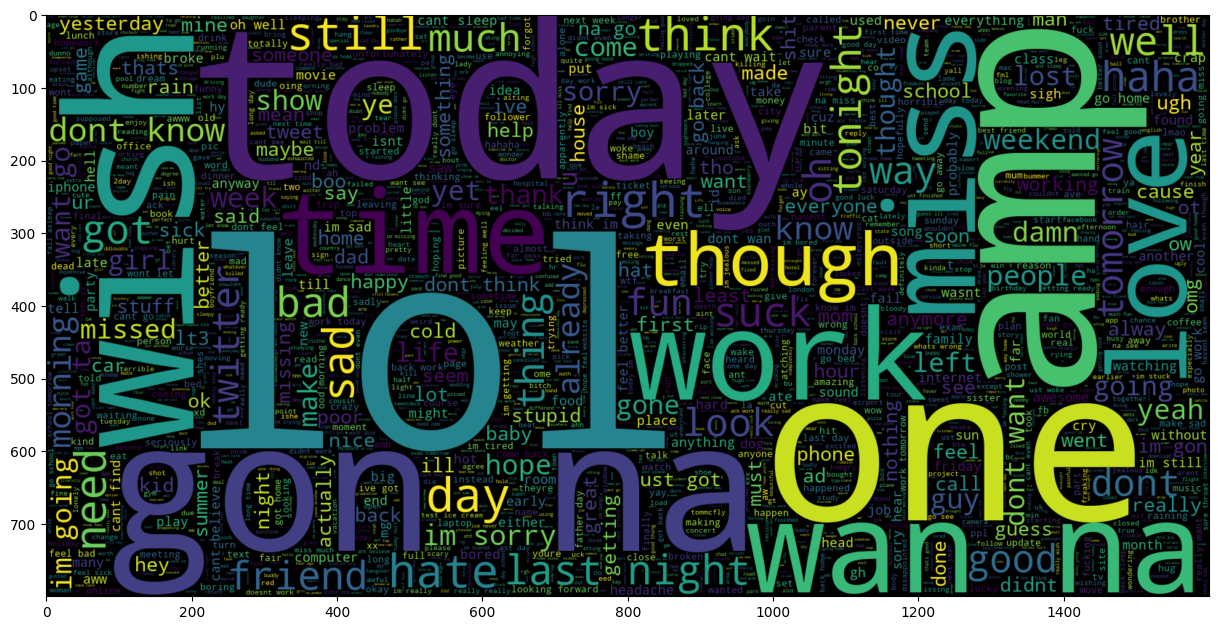

In [21]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

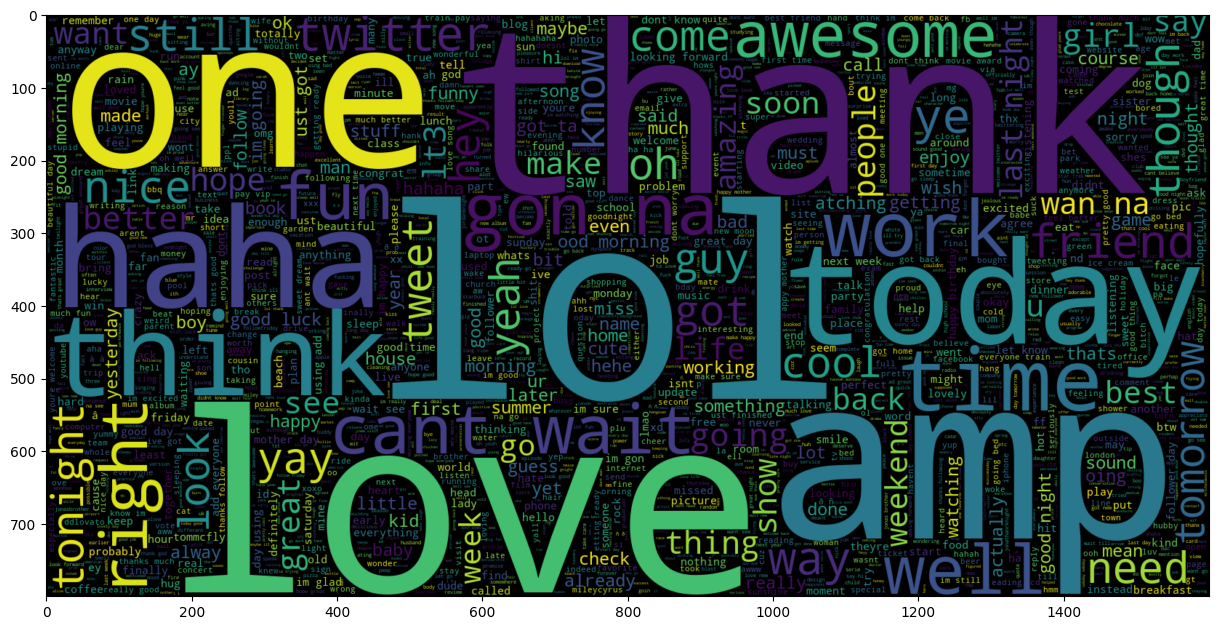

In [22]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [23]:
X = df['processed_tweets'].values
y = df['sentiment'].values

In [24]:
print(X.shape)
print(y.shape)

(1600000,)
(1600000,)


In [25]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
X = df['processed_tweets'].values
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

Vector fitted.
No. of feature_words:  762358


In [26]:
print(X.shape)
print(y.shape)

(1600000, 762358)
(1600000,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [28]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1280000, 762358)
y_train (1280000,)

X_test (320000, 762358)
y_test (320000,)


In [29]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)
    
    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Accuracy of model on training data : 81.621328125
Accuracy of model on testing data : 78.4440625 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159763
           1       0.77      0.81      0.79    160237

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000



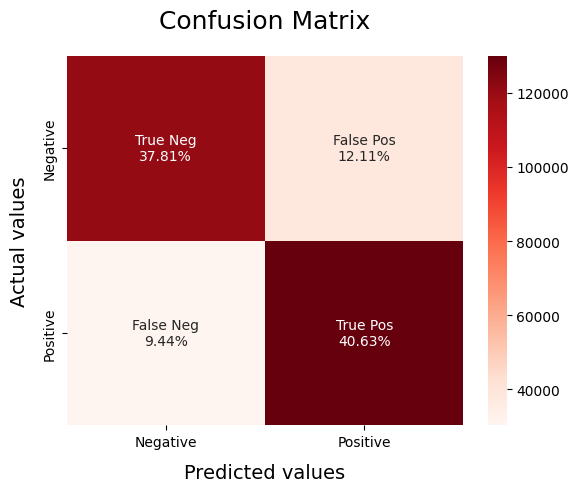

In [30]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

c:\Users\devas\miniconda3\envs\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy of model on training data : 89.192578125
Accuracy of model on testing data : 77.8465625 

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    159763
           1       0.77      0.79      0.78    160237

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



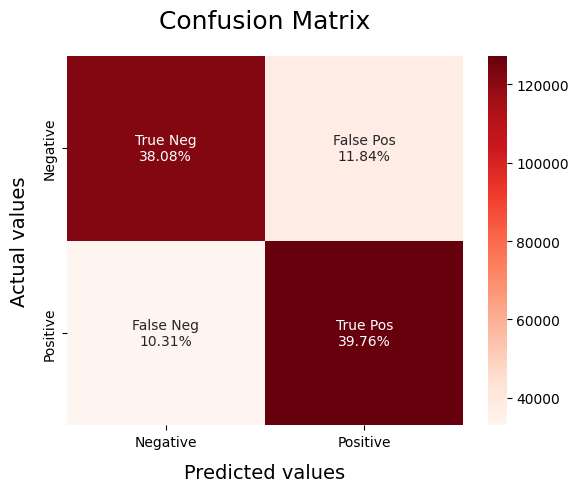

In [101]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 96.677578125
Accuracy of model on testing data : 62.57625 

              precision    recall  f1-score   support

           0       0.62      0.65      0.63    159763
           1       0.63      0.60      0.62    160237

    accuracy                           0.63    320000
   macro avg       0.63      0.63      0.63    320000
weighted avg       0.63      0.63      0.63    320000



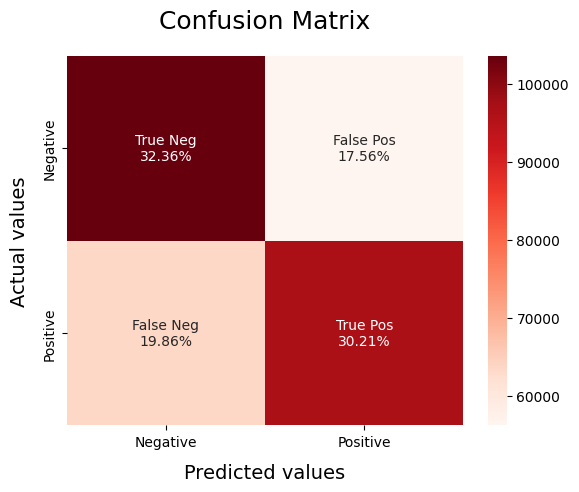

In [146]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 82.524453125
Accuracy of model on testing data : 78.4234375 

              precision    recall  f1-score   support

           0       0.80      0.76      0.78    159763
           1       0.77      0.81      0.79    160237

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



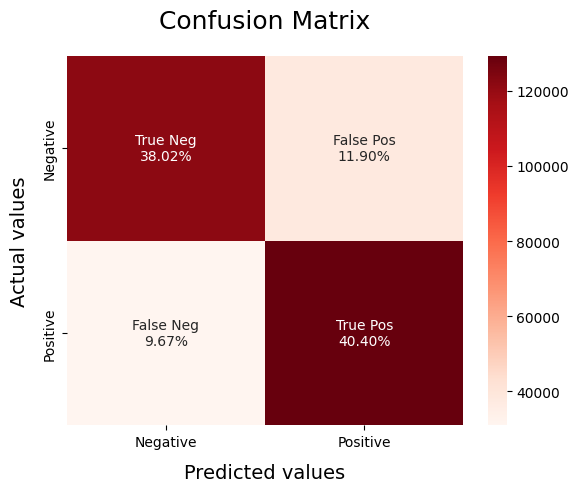

In [104]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

Accuracy of model on training data : 83.894296875
Accuracy of model on testing data : 77.2934375 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159763
           1       0.78      0.76      0.77    160237

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



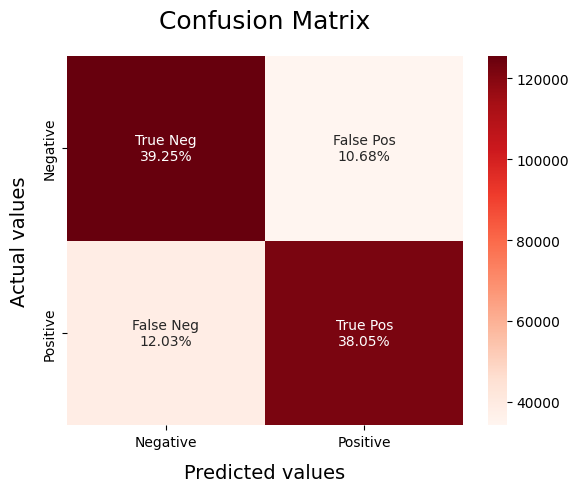

In [106]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

Accuracy of model on training data : 82.395625
Accuracy of model on testing data : 77.4503125 

              precision    recall  f1-score   support

           0       0.77      0.79      0.78    159763
           1       0.78      0.76      0.77    160237

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



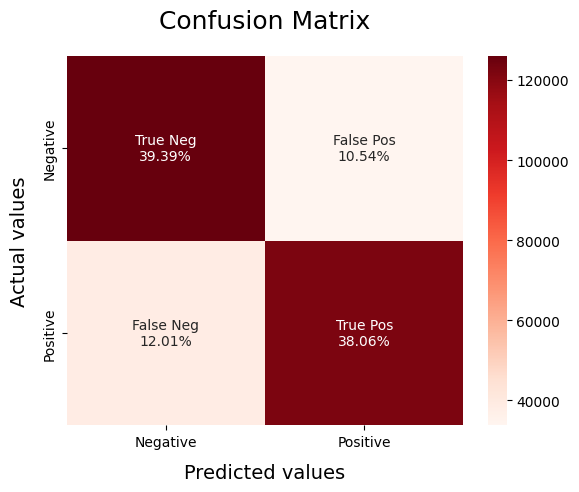

In [107]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

Accuracy of model on training data : 87.303984375
Accuracy of model on testing data : 74.588125 

              precision    recall  f1-score   support

           0       0.74      0.77      0.75    159763
           1       0.76      0.72      0.74    160237

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



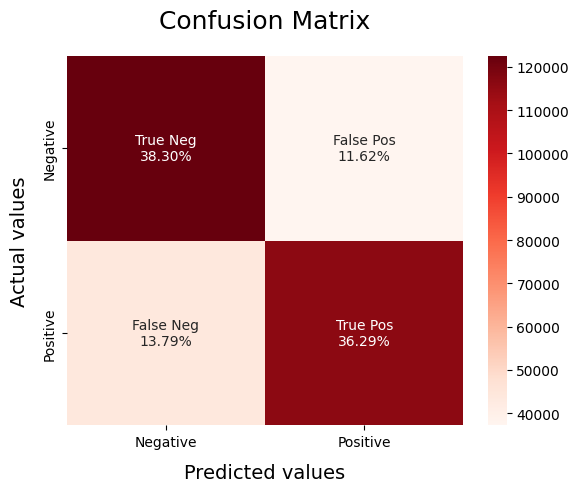

In [31]:
MNBmodel = MultinomialNB(alpha = 0.1)
MNBmodel.fit(X_train, y_train)
model_Evaluate(MNBmodel)

In [127]:

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re

In [128]:
import keras
keras.__version__

'3.0.5'

In [131]:
# from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.processed_tweets)
sequences = tokenizer.texts_to_sequences(df.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...  759 1865    2]
 [   0    0    0 ...   11  187 1283]
 [   0    0    0 ...  368    6 3132]
 ...
 [   0    0    0 ...  123  504 1746]
 [   0    0    0 ...  415 4997   12]
 [   0    0    0 ...    0    0  458]]


In [139]:
X_train, X_test, y_train, y_test = train_test_split(tweets, df.sentiment.values, test_size=0.2, random_state=101)

In [143]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("models/rnn_model.keras", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
39998/40000 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7614 - loss: 0.4887
Epoch 1: val_accuracy improved from -inf to 0.78097, saving model to models/rnn_model.keras
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 1244s 31ms/step - accuracy: 0.7614 - loss: 0.4887 - val_accuracy: 0.7810 - val_loss: 0.4579
Epoch 2/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7853 - loss: 0.4527
Epoch 2: val_accuracy improved from 0.78097 to 0.78584, saving model to models/rnn_model.keras
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 1084s 27ms/step - accuracy: 0.7853 - loss: 0.4527 - val_accuracy: 0.7858 - val_loss: 0.4514
Epoch 3/10
39999/40000 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7901 - loss: 0.4456
Epoch 3: val_accuracy improved from 0.78584 to 0.78666, saving model to models/rnn_model.keras
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 1110s 28ms/step - accuracy: 0.7901 - loss: 0.4456 - val_accuracy: 0.7867 - val_loss: 0.4504
Epoch 4/10
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0

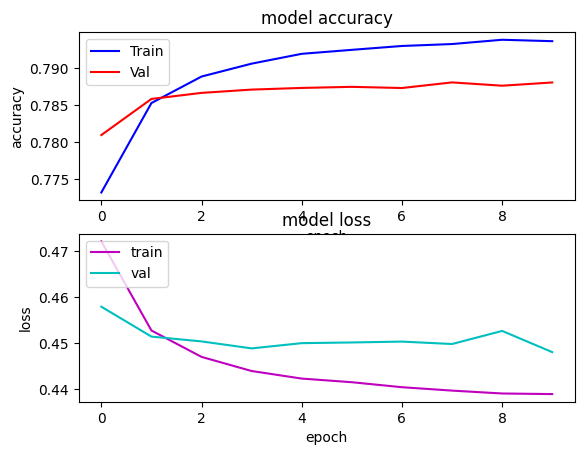

In [144]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['Train', 'Val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [149]:
model = keras.models.load_model('models/rnn_model.keras')
sequence = tokenizer.texts_to_sequences(['Congratullations on your new job!'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Positive


In [ ]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

In [ ]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [ ]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [ ]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()
    
    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good"]
    
    df = predict(vectoriser, lg, text)
    print(df.head())